In [39]:
#Step 1
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Mounted at /content/drive


In [2]:
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [40]:
# Step 2: Load all necessary NTDB 2010 files and check columns
# Load NTDB 2010 CSV files
df_ed = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/df_ed.csv")
df_demo = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/df_demo.csv")
df_comorbid = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/df_comorbid.csv")
df_dcodedes = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/df_dcodedes.csv")
df_aisp = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/df_aisp.csv")
df_ecodedes = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/df_ecodedes.csv")

# Check columns in each
print("Columns in df_ed:")
print(df_ed.columns)

print("\nColumns in df_demo:")
print(df_demo.columns)

print("\nColumns in df_comorbid:")
print(df_comorbid.columns)

print("\nColumns in df_dcodedes:")
print(df_dcodedes.columns)

print("\nColumns in df_aisp:")
print(df_aisp.columns)

print("\nColumns in df_ecodedes:")
print(df_ecodedes.columns)


Columns in df_ed:
Index(['INC_KEY', 'YOINJ', 'YOADMIT', 'WORKREL', 'INDUSTRY', 'OCCUPATION',
       'LECODE', 'LOCATION', 'TRANSFER', 'ALCOHOL', 'DRUG1', 'DRUG2', 'EDDISP',
       'EDDEATH', 'EMSRESP', 'EMSSCENE', 'EMSDAYS', 'EMSMINS', 'EDMIN',
       'EDDAYS', 'ISSLOC', 'ISSAIS', 'ISSICD', 'ISS98', 'FAC_KEY'],
      dtype='object')

Columns in df_demo:
Index(['INC_KEY', 'YOBIRTH', 'AGE', 'AGEU', 'GENDER', 'RACE1', 'RACE2',
       'ETHNIC', 'FAC_KEY', 'PAYMENT'],
      dtype='object')

Columns in df_comorbid:
Index(['INC_KEY', 'COMORKEY', 'COMORDES'], dtype='object')

Columns in df_dcodedes:
Index(['DCODE', 'DCODEDES', 'DXTYPE', 'REGION1', 'REGION2', 'REGION3'], dtype='object')

Columns in df_aisp:
Index(['INC_KEY', 'AISVER', 'PREDOT', 'SEVERITY'], dtype='object')

Columns in df_ecodedes:
Index(['ECODE', 'ECODEDES', 'INJTYPE', 'INTENT', 'MECHANISM'], dtype='object')


In [41]:

!pip install pyreadstat

In [42]:

import pyreadstat

# Load discharge file correctly
df_discharge, meta = pyreadstat.read_sas7bdat("/content/drive/My Drive/Project with Medical School and Paria/rds_discharge.sas7bdat")

In [43]:

print(df_discharge.columns)

Index(['hospdisp', 'INC_KEY', 'YODISCH', 'PAYMENT', 'LOSMIN', 'LOSDAYS',
       'ICUDAYS', 'VENTDAYS', 'FAC_KEY'],
      dtype='object')


In [44]:
#step3
df_dcode = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/PUF_DCODE.csv")

/tmp/ipython-input-44-1793958514.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dcode = pd.read_csv("/content/drive/My Drive/Project with Medical School and Paria/PUF_DCODE.csv")


In [45]:
print(df_dcode.columns)

Index(['INC_KEY', 'DCODE'], dtype='object')


In [46]:
#Step4
#Select only the important columns from each dataset
#These are all clinically meaningful features that could help predict diaphragmatic injury.
# From df_ed (Emergency Department Data)
df_ed_small = df_ed[['INC_KEY', 'YOINJ', 'LOCATION', 'LECODE', 'TRANSFER', 'ALCOHOL', 'DRUG1', 'DRUG2', 'EDDISP', 'EDDEATH']]

# From df_demo (Demographics)
df_demo_small = df_demo[['INC_KEY', 'AGE', 'GENDER', 'RACE1', 'RACE2', 'ETHNIC', 'PAYMENT']]

# From df_comorbid (Comorbidities) — keep everything for now
df_comorbid_small = df_comorbid.copy()

# From df_aisp (Injury Severity)
df_aisp_small = df_aisp[['INC_KEY', 'AISVER', 'PREDOT', 'SEVERITY']]

# From df_ecodedes (Mechanism of Injury Descriptions)
df_ecodedes_small = df_ecodedes[['ECODE', 'ECODEDES', 'MECHANISM']]  # Only necessary columns

# From df_dcodedes (Mechanism of Injury Descriptions)
df_dcodedes_small = df_dcodedes[['DCODE', 'DCODEDES']]

print("Selected important columns from all datasets.")


Selected important columns from all datasets.


In [47]:
#Step5
#Merge All Datasets into One Master Table (df_merged)
# Start with ED data (main dataset)
df_merged = df_ed_small.copy()

# Merge with Demographics
df_merged = pd.merge(df_merged, df_demo_small, on='INC_KEY', how='left')

# Merge with Comorbidities
df_merged = pd.merge(df_merged, df_comorbid_small, on='INC_KEY', how='left')

# Merge with Injury Severity
df_merged = pd.merge(df_merged, df_aisp_small, on='INC_KEY', how='left')

# Merge with Mechanism of Injury Description (linking LECODE ➔ ECODE ➔ ECODEDES)
df_merged = pd.merge(df_merged, df_ecodedes_small, left_on='LECODE', right_on='ECODE', how='left')

# Preview result
print("All datasets merged successfully!")
df_merged.head()

/tmp/ipython-input-47-3848456189.py:16: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_merged = pd.merge(df_merged, df_ecodedes_small, left_on='LECODE', right_on='ECODE', how='left')


All datasets merged successfully!


,INC_KEY,YOINJ,LOCATION,LECODE,TRANSFER,ALCOHOL,DRUG1,DRUG2,EDDISP,EDDEATH,...,ETHNIC,PAYMENT,COMORKEY,COMORDES,AISVER,PREDOT,SEVERITY,ECODE,ECODEDES,MECHANISM
0,11000000.0,2010,Street,5,No,Not Known/Not Recorded BIU 2,Not Known/Not Recorded BIU 2,Not Known/Not Recorded BIU 2,Home without services,Not Applicable BIU 1,...,Not Hispanic or Latino,Other Government,-1,Not Applicable BIU 1,NaN,NaN,NaN,5.0,Activities involving dancing,NaN
1,11000001.0,2010,Home,0,No,Not Known/Not Recorded BIU 2,Not Applicable BIU 1,Not Known/Not Recorded BIU 2,"Floor bed (general admission, non specialty un...",Not Applicable BIU 1,...,Not Hispanic or Latino,Blue Cross/Blue Shield,-1,Not Applicable BIU 1,NaN,NaN,NaN,0.0,Civilian activity done for income or pay,NaN
2,11000002.0,2010,Street,5,Yes,Not Known/Not Recorded BIU 2,Not Applicable BIU 1,Not Known/Not Recorded BIU 2,Telemetry/step-down unit (less acuity than ICU),Not Applicable BIU 1,...,Not Hispanic or Latino,Blue Cross/Blue Shield,23,Respiratory Disease,NaN,NaN,NaN,5.0,Activities involving dancing,NaN
3,11000003.0,2010,Street,5,Yes,Not Known/Not Recorded BIU 2,Not Applicable BIU 1,Not Known/Not Recorded BIU 2,Telemetry/step-down unit (less acuity than ICU),Not Applicable BIU 1,...,Not Hispanic or Latino,Blue Cross/Blue Shield,-1,Not Applicable BIU 1,NaN,NaN,NaN,5.0,Activities involving dancing,NaN
4,11000004.0,2010,Street,5,No,Not Known/Not Recorded BIU 2,Not Applicable BIU 1,Not Known/Not Recorded BIU 2,Telemetry/step-down unit (less acuity than ICU),Not Applicable BIU 1,...,Not Hispanic or Latino,Blue Cross/Blue Shield,-1,Not Applicable BIU 1,NaN,NaN,NaN,5.0,Activities involving dancing,NaN


In [48]:
print([col for col in df_merged.columns if col.startswith('dcode')])

[]


In [49]:
# Step 6: Create mortality column from EDDEATH in df_ed before trimming columns
df_merged['mortality'] = df_ed['EDDEATH'].map(lambda x: 1 if str(x).strip().lower() in ['yes', '1'] else 0)

In [50]:
#Step 7
#Extract only the needed columns from df_ed
df_iss = df_ed[['INC_KEY', 'ISSAIS']].copy()

# Rename ISSAIS to ISS (cleaner name)
df_iss.rename(columns={'ISSAIS': 'ISS'}, inplace=True)

# Step 2: Merge ISS into df_merged
df_merged = df_merged.merge(df_iss, on='INC_KEY', how='left')

# Optional: Check if ISS was added successfully
print(df_merged[['INC_KEY', 'ISS']].head())


      INC_KEY  ISS
0  11000000.0  4.0
1  11000001.0  1.0
2  11000002.0  4.0
3  11000003.0  5.0
4  11000004.0  8.0


In [51]:
# Step 8
#Create binary flag for ICD-9 code 860.0 (Traumatic pneumothorax)
df_dcode['DCODE'] = df_dcode['DCODE'].astype(str)  # make sure it's string
df_dcode['inj_pneumothorax'] = df_dcode['DCODE'].str.strip().eq('860.0').astype(int)

# Step: Reduce to patient level
df_pneumo = df_dcode.groupby('INC_KEY')['inj_pneumothorax'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_pneumo, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_pneumothorax'] = df_merged['inj_pneumothorax'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_pneumothorax']].head())

      INC_KEY  inj_pneumothorax
0  11000000.0                 0
1  11000001.0                 0
2  11000002.0                 0
3  11000003.0                 0
4  11000004.0                 0


In [52]:
# Step 9
#Create binary flag for ICD-9 code 860.1 (Traumatic hemothorax)
df_dcode['inj_hemothorax'] = df_dcode['DCODE'].str.strip().eq('860.1').astype(int)

# Step: Reduce to patient level
df_hemo = df_dcode.groupby('INC_KEY')['inj_hemothorax'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_hemo, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_hemothorax'] = df_merged['inj_hemothorax'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_hemothorax']].head())


      INC_KEY  inj_hemothorax
0  11000000.0               0
1  11000001.0               0
2  11000002.0               0
3  11000003.0               0
4  11000004.0               0


In [53]:
# Step 10
# Create binary flag for ICD-9 code 861.1 (Injury to lung)
df_dcode['inj_lung'] = df_dcode['DCODE'].str.strip().eq('861.1').astype(int)

# Step: Reduce to patient level
df_lung = df_dcode.groupby('INC_KEY')['inj_lung'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_lung, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_lung'] = df_merged['inj_lung'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_lung']].head())

      INC_KEY  inj_lung
0  11000000.0         0
1  11000001.0         0
2  11000002.0         0
3  11000003.0         0
4  11000004.0         0


In [54]:
# Step 11
# Create binary flag for ICD-9 code 861.0 (Injury to heart)
df_dcode['inj_heart'] = df_dcode['DCODE'].str.strip().eq('861.0').astype(int)

# Step: Reduce to patient level
df_heart = df_dcode.groupby('INC_KEY')['inj_heart'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_heart, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_heart'] = df_merged['inj_heart'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_heart']].head())

      INC_KEY  inj_heart
0  11000000.0          0
1  11000001.0          0
2  11000002.0          0
3  11000003.0          0
4  11000004.0          0


In [55]:
# Step 12
# Create binary flag for ICD-9 code 518.81 (Acute respiratory failure)
df_dcode['inj_respiratory_failure'] = df_dcode['DCODE'].eq('518.81').astype(int)

# Step: Reduce to patient level
df_resp = df_dcode.groupby('INC_KEY')['inj_respiratory_failure'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_resp, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_respiratory_failure'] = df_merged['inj_respiratory_failure'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_respiratory_failure']].head())


      INC_KEY  inj_respiratory_failure
0  11000000.0                        0
1  11000001.0                        0
2  11000002.0                        0
3  11000003.0                        0
4  11000004.0                        0


In [56]:
# Step 13
#Create binary flag for ICD-9 code 511.9 (Pleural effusion)
df_dcode['inj_pleural_effusion'] = df_dcode['DCODE'].eq('511.9').astype(int)

# Step: Reduce to patient level
df_pleural = df_dcode.groupby('INC_KEY')['inj_pleural_effusion'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_pleural, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_pleural_effusion'] = df_merged['inj_pleural_effusion'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_pleural_effusion']].head())

      INC_KEY  inj_pleural_effusion
0  11000000.0                     0
1  11000001.0                     0
2  11000002.0                     0
3  11000003.0                     0
4  11000004.0                     0


In [57]:
# Step 14
# Create binary flag for ICD-9 code 348.3 (Encephalopathy)
df_dcode['inj_encephalopathy'] = df_dcode['DCODE'].eq('348.3').astype(int)

# Step: Reduce to patient level
df_encephalopathy = df_dcode.groupby('INC_KEY')['inj_encephalopathy'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_encephalopathy, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_encephalopathy'] = df_merged['inj_encephalopathy'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_encephalopathy']].head())

      INC_KEY  inj_encephalopathy
0  11000000.0                   0
1  11000001.0                   0
2  11000002.0                   0
3  11000003.0                   0
4  11000004.0                   0


In [58]:
# Step 15
# Create binary flag for ICD-9 code 780.09 (Altered mental status)
df_dcode['inj_mental_status'] = df_dcode['DCODE'].eq('780.09').astype(int)

# Step: Reduce to patient level
df_mental_status = df_dcode.groupby('INC_KEY')['inj_mental_status'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_mental_status, on='INC_KEY', how='left')

# Step: Fill missing values (patients without this diagnosis)
df_merged['inj_mental_status'] = df_merged['inj_mental_status'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_mental_status']].head())

      INC_KEY  inj_mental_status
0  11000000.0                  0
1  11000001.0                  0
2  11000002.0                  0
3  11000003.0                  0
4  11000004.0                  0


In [59]:
# Step 16
# Create binary flag for ICD-9 code 997.01 (CNS complications)
df_dcode['inj_cns_complication'] = df_dcode['DCODE'].eq('997.01').astype(int)

# Step: Reduce to patient level
df_cns_complication = df_dcode.groupby('INC_KEY')['inj_cns_complication'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_cns_complication, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_cns_complication'] = df_merged['inj_cns_complication'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_cns_complication']].head())

      INC_KEY  inj_cns_complication
0  11000000.0                     0
1  11000001.0                     0
2  11000002.0                     0
3  11000003.0                     0
4  11000004.0                     0


In [60]:
# Step 17
# Create binary flag for ICD-9 code 998.11 (Hemorrhage complicating a procedure)
df_dcode['inj_hemorrhage_complication'] = df_dcode['DCODE'].eq('998.11').astype(int)

# Step: Reduce to patient level
df_hemorrhage_complication = df_dcode.groupby('INC_KEY')['inj_hemorrhage_complication'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_hemorrhage_complication, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_hemorrhage_complication'] = df_merged['inj_hemorrhage_complication'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_hemorrhage_complication']].head())

      INC_KEY  inj_hemorrhage_complication
0  11000000.0                            0
1  11000001.0                            0
2  11000002.0                            0
3  11000003.0                            0
4  11000004.0                            0


In [61]:
# Step 18
# Create binary flag for ICD-9 code 785.59 (Other shock without trauma)
df_dcode['inj_shock_other'] = df_dcode['DCODE'].eq('785.59').astype(int)

# Step: Reduce to patient level
df_shock_other = df_dcode.groupby('INC_KEY')['inj_shock_other'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_shock_other, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_shock_other'] = df_merged['inj_shock_other'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_shock_other']].head())

      INC_KEY  inj_shock_other
0  11000000.0                0
1  11000001.0                0
2  11000002.0                0
3  11000003.0                0
4  11000004.0                0


In [62]:
# Step 19
# Create binary flag for ICD-9 code 38.9 (Septicemia, unspecified organism)
df_dcode['inj_septicemia'] = df_dcode['DCODE'].eq('38.9').astype(int)

# Step: Reduce to patient level
df_septicemia = df_dcode.groupby('INC_KEY')['inj_septicemia'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_septicemia, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_septicemia'] = df_merged['inj_septicemia'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_septicemia']].head())

      INC_KEY  inj_septicemia
0  11000000.0               0
1  11000001.0               0
2  11000002.0               0
3  11000003.0               0
4  11000004.0               0


In [63]:
# Step 20
# Create binary flag for ICD-9 code 995.91 (Sepsis)
df_dcode['inj_sepsis'] = df_dcode['DCODE'].eq('995.91').astype(int)

# Step: Reduce to patient level
df_sepsis = df_dcode.groupby('INC_KEY')['inj_sepsis'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_sepsis, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_sepsis'] = df_merged['inj_sepsis'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_sepsis']].head())

      INC_KEY  inj_sepsis
0  11000000.0           0
1  11000001.0           0
2  11000002.0           0
3  11000003.0           0
4  11000004.0           0


In [64]:
# Step 21
# Create binary flag for ICD-9 code 998.59 (Postoperative infection)
df_dcode['inj_postop_infection'] = df_dcode['DCODE'].eq('998.59').astype(int)

# Step: Reduce to patient level
df_postop_infection = df_dcode.groupby('INC_KEY')['inj_postop_infection'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_postop_infection, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_postop_infection'] = df_merged['inj_postop_infection'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_postop_infection']].head())

      INC_KEY  inj_postop_infection
0  11000000.0                     0
1  11000001.0                     0
2  11000002.0                     0
3  11000003.0                     0
4  11000004.0                     0


In [65]:
# Step 22
# Create binary flag for ICD-9 code 998.2 (Accidental puncture/laceration during procedure)
df_dcode['inj_accidental_laceration'] = df_dcode['DCODE'].eq('998.2').astype(int)

# Step: Reduce to patient level
df_acc_laceration = df_dcode.groupby('INC_KEY')['inj_accidental_laceration'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_acc_laceration, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_accidental_laceration'] = df_merged['inj_accidental_laceration'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_accidental_laceration']].head())

      INC_KEY  inj_accidental_laceration
0  11000000.0                          0
1  11000001.0                          0
2  11000002.0                          0
3  11000003.0                          0
4  11000004.0                          0


In [66]:
# Step 23
# Create binary flag for ICD-9 code 997.4 (Digestive system complications)
df_dcode['inj_digestive_complication'] = df_dcode['DCODE'].eq('997.4').astype(int)

# Step: Reduce to patient level
df_digestive = df_dcode.groupby('INC_KEY')['inj_digestive_complication'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_digestive, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_digestive_complication'] = df_merged['inj_digestive_complication'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_digestive_complication']].head())

      INC_KEY  inj_digestive_complication
0  11000000.0                           0
1  11000001.0                           0
2  11000002.0                           0
3  11000003.0                           0
4  11000004.0                           0


In [67]:
# Step 24
# Create binary flag for ICD-9 code 997.5 (Urinary system complications)
df_dcode['inj_urinary_complication'] = df_dcode['DCODE'].eq('997.5').astype(int)

# Step: Reduce to patient level
df_urinary = df_dcode.groupby('INC_KEY')['inj_urinary_complication'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_urinary, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_urinary_complication'] = df_merged['inj_urinary_complication'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_urinary_complication']].head())

      INC_KEY  inj_urinary_complication
0  11000000.0                         0
1  11000001.0                         0
2  11000002.0                         0
3  11000003.0                         0
4  11000004.0                         0


In [68]:
# Step 25
# Create binary flag for ICD-9 code 996.73 (Infection due to device, implant, or graft)
df_dcode['inj_device_infection'] = df_dcode['DCODE'].eq('996.73').astype(int)

# Step: Reduce to patient level
df_device_infection = df_dcode.groupby('INC_KEY')['inj_device_infection'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_device_infection, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_device_infection'] = df_merged['inj_device_infection'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_device_infection']].head())

      INC_KEY  inj_device_infection
0  11000000.0                     0
1  11000001.0                     0
2  11000002.0                     0
3  11000003.0                     0
4  11000004.0                     0


In [69]:
# Step 26
# Create binary flag for ICD-9 code 998.3 (Disruption of wound)
df_dcode['inj_wound_disruption'] = df_dcode['DCODE'].eq('998.3').astype(int)

# Step: Reduce to patient level
df_wound_disruption = df_dcode.groupby('INC_KEY')['inj_wound_disruption'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_wound_disruption, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_wound_disruption'] = df_merged['inj_wound_disruption'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_wound_disruption']].head())

      INC_KEY  inj_wound_disruption
0  11000000.0                     0
1  11000001.0                     0
2  11000002.0                     0
3  11000003.0                     0
4  11000004.0                     0


In [70]:
# Step 27
# Create binary flag for ICD-9 code 518.5 (Pulmonary insufficiency following trauma or surgery)
df_dcode['inj_pulm_insuff'] = df_dcode['DCODE'].eq('518.5').astype(int)

# Step: Reduce to patient level
df_pulm_insuff = df_dcode.groupby('INC_KEY')['inj_pulm_insuff'].max().reset_index()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_pulm_insuff, on='INC_KEY', how='left')

# Step: Fill missing values
df_merged['inj_pulm_insuff'] = df_merged['inj_pulm_insuff'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_pulm_insuff']].head())

      INC_KEY  inj_pulm_insuff
0  11000000.0                0
1  11000001.0                0
2  11000002.0                0
3  11000003.0                0
4  11000004.0                0


In [71]:
#Step 28
# NEW INJURY FLAGS BASED ON ICD-9 GROUPS
# Ensure all dcode columns are strings and trimmed
dcode_columns = [col for col in df_dcode.columns if col.lower().startswith('dcode')]
df_dcode[dcode_columns] = df_dcode[dcode_columns].astype(str).apply(lambda x: x.str.strip())

def flag_injury(row, code_list):
    return int(any(code in code_list for code in row))

# ICD-9 groups from advisor
df_dcode['inj_spleen'] = df_dcode[dcode_columns].apply(flag_injury, axis=1, code_list=[
    '865.00', '865.01', '865.02', '865.03', '865.04', '865.05', '865.06', '865.07', '865.08', '865.09',
    '865.10', '865.11', '865.12', '865.13', '865.14', '865.15', '865.16', '865.17', '865.18', '865.19'
])
df_dcode['inj_bladder'] = df_dcode[dcode_columns].apply(flag_injury, axis=1, code_list=['867.0', '867.1'])
df_dcode['inj_bowel'] = df_dcode[dcode_columns].apply(flag_injury, axis=1, code_list=[
    '863.0', '863.1', '863.2', '863.3', '863.4', '863.5', '863.6', '863.7', '863.8', '863.9'
])
df_dcode['inj_liver'] = df_dcode[dcode_columns].apply(flag_injury, axis=1, code_list=[
    '864.00', '864.01', '864.02', '864.03', '864.04', '864.05', '864.06', '864.07', '864.08', '864.09',
    '864.10', '864.11', '864.12', '864.13', '864.14', '864.15', '864.16', '864.17', '864.18', '864.19'
])
df_dcode['inj_hemothorax_group'] = df_dcode[dcode_columns].apply(flag_injury, axis=1, code_list=['860.2', '860.3'])

# Reduce to patient-level
df_spleen = df_dcode.groupby('INC_KEY')['inj_spleen'].max().reset_index()
df_bladder = df_dcode.groupby('INC_KEY')['inj_bladder'].max().reset_index()
df_bowel = df_dcode.groupby('INC_KEY')['inj_bowel'].max().reset_index()
df_liver = df_dcode.groupby('INC_KEY')['inj_liver'].max().reset_index()
df_hemothorax = df_dcode.groupby('INC_KEY')['inj_hemothorax_group'].max().reset_index()

# Merge into main dataset
df_merged = df_merged.merge(df_spleen, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_bladder, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_bowel, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_liver, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_hemothorax, on='INC_KEY', how='left')

# Fill missing values
df_merged[['inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver', 'inj_hemothorax_group']] = (
    df_merged[['inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver', 'inj_hemothorax_group']].fillna(0).astype(int)
)

print("New injury flags added based on advisor ICD-9 code list.")


New injury flags added based on advisor ICD-9 code list.


In [72]:
# Step 29
# Extract outcome measures and merge into main dataset
df_outcomes = df_discharge[['INC_KEY', 'ICUDAYS', 'LOSDAYS', 'VENTDAYS']].copy()

# Convert columns to numeric (in case of text issues)
df_outcomes['ICUDAYS'] = pd.to_numeric(df_outcomes['ICUDAYS'], errors='coerce')
df_outcomes['LOSDAYS'] = pd.to_numeric(df_outcomes['LOSDAYS'], errors='coerce')
df_outcomes['VENTDAYS'] = pd.to_numeric(df_outcomes['VENTDAYS'], errors='coerce')

# Merge with your main dataset
df_merged = df_merged.merge(df_outcomes, on='INC_KEY', how='left')

# Preview
print(df_merged[['INC_KEY', 'ICUDAYS', 'LOSDAYS', 'VENTDAYS']].head())

      INC_KEY  ICUDAYS  LOSDAYS  VENTDAYS
0  11000000.0     -2.0      1.0      -2.0
1  11000001.0     -1.0      1.0      -1.0
2  11000002.0      1.0      1.0      -1.0
3  11000003.0      2.0      5.0      -1.0
4  11000004.0      2.0      2.0      -2.0


In [73]:
# Step 30
# Extract hospital discharge disposition and merge
df_dispo = df_discharge[['INC_KEY', 'hospdisp']].copy()

# Optional: Preview the unique values (e.g., Home, SNF, Rehab, Expired)
print("Unique discharge dispositions:", df_dispo['hospdisp'].unique())

# Merge with main dataset
df_merged = df_merged.merge(df_dispo, on='INC_KEY', how='left')

# Preview result
print(df_merged[['INC_KEY', 'hospdisp']].head())

Unique discharge dispositions: ['Discharged home with no home services' 'Not Applicable BIU 1'
 'Discharged/Transferred to another type of rehabilitation or long term'
 'Discharged/Transferred to a short-term general hospital for inpatient'
 'Discharge/Transferred to home under care of organized home health serv'
 'Expired' 'Left against medical advice or discontinued care'
 'Discharged/Transferred to Skilled Nursing Facility'
 'Discharged/Transferred to an Intermediate Care Facility (ICF)'
 'Discharged/Transferred to hospice care' 'Not Known/Not Recorded BIU 2']
      INC_KEY                               hospdisp
0  11000000.0                   Not Applicable BIU 1
1  11000001.0  Discharged home with no home services
2  11000002.0  Discharged home with no home services
3  11000003.0  Discharged home with no home services
4  11000004.0  Discharged home with no home services


In [74]:
# Step 31
# Flag patients with any ICD-9 code for postoperative complications
postop_codes = ['998.59', '998.2', '997.4', '997.5', '996.73', '998.3']

# Ensure DCODE is string
df_dcode['DCODE'] = df_dcode['DCODE'].astype(str).str.strip()

# Create binary flag
df_dcode['postop_complication'] = df_dcode['DCODE'].isin(postop_codes).astype(int)

# Reduce to patient-level
df_postop = df_dcode.groupby('INC_KEY')['postop_complication'].max().reset_index()

# Merge with main dataset
df_merged = df_merged.merge(df_postop, on='INC_KEY', how='left')

# Fill missing with 0 (no complication recorded)
df_merged['postop_complication'] = df_merged['postop_complication'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'postop_complication']].head())


      INC_KEY  postop_complication
0  11000000.0                    0
1  11000001.0                    0
2  11000002.0                    0
3  11000003.0                    0
4  11000004.0                    0


In [75]:
# Step 32
# Flag patients with ICD-9 codes for sepsis
sepsis_codes = ['38.9', '995.91']

# Ensure DCODE column is string and trimmed
df_dcode['DCODE'] = df_dcode['DCODE'].astype(str).str.strip()

# Create binary flag
df_dcode['sepsis'] = df_dcode['DCODE'].isin(sepsis_codes).astype(int)

# Reduce to patient-level
df_sepsis = df_dcode.groupby('INC_KEY')['sepsis'].max().reset_index()

# Merge with main dataset
df_merged = df_merged.merge(df_sepsis, on='INC_KEY', how='left')

# Fill missing with 0 (no sepsis recorded)
df_merged['sepsis'] = df_merged['sepsis'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'sepsis']].head())


      INC_KEY  sepsis
0  11000000.0       0
1  11000001.0       0
2  11000002.0       0
3  11000003.0       0
4  11000004.0       0


In [76]:
#Step33
# Convert EDDEATH to a clean binary mortality variable
df_merged['mortality'] = df_merged['EDDEATH'].map(lambda x: 1 if str(x).strip().lower() in ['yes', '1'] else 0)

# Preview
print(df_merged[['INC_KEY', 'EDDEATH', 'mortality']].head())

      INC_KEY               EDDEATH  mortality
0  11000000.0  Not Applicable BIU 1          0
1  11000001.0  Not Applicable BIU 1          0
2  11000002.0  Not Applicable BIU 1          0
3  11000003.0  Not Applicable BIU 1          0
4  11000004.0  Not Applicable BIU 1          0


In [77]:
# Step34
# Convert ICUDAYS to numeric (invalid entries will become NaN)
df_discharge['ICUDAYS'] = pd.to_numeric(df_discharge['ICUDAYS'], errors='coerce')

# Step: Reduce to patient level
df_icu = df_discharge[['INC_KEY', 'ICUDAYS']].copy()

# Step: Merge with main dataset
df_merged = df_merged.merge(df_icu, on='INC_KEY', how='left')

In [78]:
# Step35
# Convert LOSDAYS to numeric (in case of bad entries)
df_discharge['LOSDAYS'] = pd.to_numeric(df_discharge['LOSDAYS'], errors='coerce')

# Step: Extract and merge with your dataset
df_los = df_discharge[['INC_KEY', 'LOSDAYS']].copy()
df_merged = df_merged.merge(df_los, on='INC_KEY', how='left')

In [79]:
# Step36
# Convert VENTDAYS to numeric (in case of missing or invalid entries)
df_discharge['VENTDAYS'] = pd.to_numeric(df_discharge['VENTDAYS'], errors='coerce')

# Step: Extract and merge with your main dataset
df_vent = df_discharge[['INC_KEY', 'VENTDAYS']].copy()
df_merged = df_merged.merge(df_vent, on='INC_KEY', how='left')

In [80]:
#Step37
# List of rib fracture ICD-9 codes
rib_fracture_codes = [
    '807.01', '807.11', '807.02', '807.12', '807.03', '807.04', '807.05',
    '807.06', '807.07', '807.08', '807.09', '807.13', '807.14', '807.15',
    '807.16', '807.17', '807.18', '807.19'
]

# Find dcode columns
dcode_cols = [col for col in df_merged.columns if col.startswith('dcode')]

# Create binary flag for rib fracture
df_merged['inj_rib_fracture'] = df_merged[dcode_cols].isin(rib_fracture_codes).any(axis=1).astype(int)

In [81]:
print(df_merged.columns.tolist())

['INC_KEY', 'YOINJ', 'LOCATION', 'LECODE', 'TRANSFER', 'ALCOHOL', 'DRUG1', 'DRUG2', 'EDDISP', 'EDDEATH', 'AGE', 'GENDER', 'RACE1', 'RACE2', 'ETHNIC', 'PAYMENT', 'COMORKEY', 'COMORDES', 'AISVER', 'PREDOT', 'SEVERITY', 'ECODE', 'ECODEDES', 'MECHANISM', 'mortality', 'ISS', 'inj_pneumothorax', 'inj_hemothorax', 'inj_lung', 'inj_heart', 'inj_respiratory_failure', 'inj_pleural_effusion', 'inj_encephalopathy', 'inj_mental_status', 'inj_cns_complication', 'inj_hemorrhage_complication', 'inj_shock_other', 'inj_septicemia', 'inj_sepsis', 'inj_postop_infection', 'inj_accidental_laceration', 'inj_digestive_complication', 'inj_urinary_complication', 'inj_device_infection', 'inj_wound_disruption', 'inj_pulm_insuff', 'inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver', 'inj_hemothorax_group', 'ICUDAYS_x', 'LOSDAYS_x', 'VENTDAYS_x', 'hospdisp', 'postop_complication', 'sepsis', 'ICUDAYS_y', 'LOSDAYS_y', 'VENTDAYS_y', 'inj_rib_fracture']


In [82]:
#Step38
# Ensure DCODE column is string
df_dcode['DCODE'] = df_dcode['DCODE'].astype(str).str.strip()

# List of thoracic aorta injury codes from advisor
thoracic_aorta_codes = ['9010', '44101', '4412', '4410']

# Create binary flag for thoracic aorta injury
df_dcode['inj_thoracic_aorta'] = df_dcode['DCODE'].isin(thoracic_aorta_codes).astype(int)

# Step: Reduce to patient level
df_thoracic_aorta = df_dcode.groupby('INC_KEY')['inj_thoracic_aorta'].max().reset_index()

# Step: Merge with your main dataset
df_merged = df_merged.merge(df_thoracic_aorta, on='INC_KEY', how='left')

# Fill missing with 0
df_merged['inj_thoracic_aorta'] = df_merged['inj_thoracic_aorta'].fillna(0).astype(int)

# Preview
print(df_merged[['INC_KEY', 'inj_thoracic_aorta']].head())

      INC_KEY  inj_thoracic_aorta
0  11000000.0                   0
1  11000001.0                   0
2  11000002.0                   0
3  11000003.0                   0
4  11000004.0                   0


In [83]:
#Step39
# Abdominal aorta injury code from your advisor
abdominal_aorta_codes = ['9020']

# Create binary indicator for abdominal aorta injury
df_dcode['inj_abdominal_aorta'] = df_dcode['DCODE'].isin(abdominal_aorta_codes).astype(int)

# Aggregate to patient level
df_abd_aorta = df_dcode.groupby('INC_KEY')['inj_abdominal_aorta'].max().reset_index()

# Merge with main dataset
df_merged = df_merged.merge(df_abd_aorta, on='INC_KEY', how='left')

# Fill missing with 0
df_merged['inj_abdominal_aorta'] = df_merged['inj_abdominal_aorta'].fillna(0).astype(int)

# Optional: Check results
print(df_merged[['INC_KEY', 'inj_abdominal_aorta']].head())


      INC_KEY  inj_abdominal_aorta
0  11000000.0                    0
1  11000001.0                    0
2  11000002.0                    0
3  11000003.0                    0
4  11000004.0                    0


In [84]:
#step40
print(df_merged.columns)

Index(['INC_KEY', 'YOINJ', 'LOCATION', 'LECODE', 'TRANSFER', 'ALCOHOL',
       'DRUG1', 'DRUG2', 'EDDISP', 'EDDEATH', 'AGE', 'GENDER', 'RACE1',
       'RACE2', 'ETHNIC', 'PAYMENT', 'COMORKEY', 'COMORDES', 'AISVER',
       'PREDOT', 'SEVERITY', 'ECODE', 'ECODEDES', 'MECHANISM', 'mortality',
       'ISS', 'inj_pneumothorax', 'inj_hemothorax', 'inj_lung', 'inj_heart',
       'inj_respiratory_failure', 'inj_pleural_effusion', 'inj_encephalopathy',
       'inj_mental_status', 'inj_cns_complication',
       'inj_hemorrhage_complication', 'inj_shock_other', 'inj_septicemia',
       'inj_sepsis', 'inj_postop_infection', 'inj_accidental_laceration',
       'inj_digestive_complication', 'inj_urinary_complication',
       'inj_device_infection', 'inj_wound_disruption', 'inj_pulm_insuff',
       'inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver',
       'inj_hemothorax_group', 'ICUDAYS_x', 'LOSDAYS_x', 'VENTDAYS_x',
       'hospdisp', 'postop_complication', 'sepsis', 'ICUDAYS_y', 'LOSDAYS_y',
 

In [85]:
#Step41
# Fix overlapping ICU/LOS/VENT columns by choosing only one version
df_merged['ICUDAYS'] = df_merged[['ICUDAYS_x', 'ICUDAYS_y']].bfill(axis=1).iloc[:, 0]
df_merged['LOSDAYS'] = df_merged[['LOSDAYS_x', 'LOSDAYS_y']].bfill(axis=1).iloc[:, 0]
df_merged['VENTDAYS'] = df_merged[['VENTDAYS_x', 'VENTDAYS_y']].bfill(axis=1).iloc[:, 0]

# Drop the duplicate columns
df_merged.drop(columns=['ICUDAYS_x', 'ICUDAYS_y', 'LOSDAYS_x', 'LOSDAYS_y', 'VENTDAYS_x', 'VENTDAYS_y'], inplace=True)

In [88]:
#First Run Step 43
#Step42
# Add spleen, bladder, bowel, liver injuries
spleen_codes = [f"865.{str(i).zfill(2)}" for i in range(20)]  # 865.00 to 865.19
bladder_codes = ['867.0', '867.1']
bowel_codes = [f"863.{i}" for i in range(10)]  # 863.0 to 863.9
liver_codes = [f"864.{str(i).zfill(2)}" for i in range(20)]  # 864.00 to 864.19

df_dcode['inj_spleen'] = df_dcode['DCODE'].isin(spleen_codes).astype(int)
df_dcode['inj_bladder'] = df_dcode['DCODE'].isin(bladder_codes).astype(int)
df_dcode['inj_bowel'] = df_dcode['DCODE'].isin(bowel_codes).astype(int)
df_dcode['inj_liver'] = df_dcode['DCODE'].isin(liver_codes).astype(int)

# Reduce each to patient-level
df_spleen = df_dcode.groupby('INC_KEY')['inj_spleen'].max().reset_index()
df_bladder = df_dcode.groupby('INC_KEY')['inj_bladder'].max().reset_index()
df_bowel = df_dcode.groupby('INC_KEY')['inj_bowel'].max().reset_index()
df_liver = df_dcode.groupby('INC_KEY')['inj_liver'].max().reset_index()

# Merge them into df_merged
df_merged = df_merged.merge(df_spleen, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_bladder, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_bowel, on='INC_KEY', how='left')
df_merged = df_merged.merge(df_liver, on='INC_KEY', how='left')

# Fill NaNs
df_merged[['inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver']] = df_merged[
    ['inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver']].fillna(0).astype(int)

In [87]:
#Step43
# Ensure DCODE is string and trimmed
df_dcode['DCODE'] = df_dcode['DCODE'].astype(str).str.strip()

# Create injury label: 1 if any of the diaphragmatic codes exist
df_dcode['Has_Diaphragmatic_Injury'] = df_dcode['DCODE'].isin(['862.0', '862.1']).astype(int)

# Reduce to patient level
df_labels = df_dcode.groupby('INC_KEY')['Has_Diaphragmatic_Injury'].max().reset_index()

# Drop the old label column if it exists
if 'Has_Diaphragmatic_Injury' in df_merged.columns:
    df_merged = df_merged.drop(columns=['Has_Diaphragmatic_Injury'])

# Merge label into merged data
df_merged = df_merged.merge(df_labels, on='INC_KEY', how='left')

# Fill missing with 0
df_merged['Has_Diaphragmatic_Injury'] = df_merged['Has_Diaphragmatic_Injury'].fillna(0).astype(int)

In [89]:
#Step44
# Ensure DCODE is string and trimmed
df_dcode['DCODE'] = df_dcode['DCODE'].astype(str).str.strip()

# Create injury label
df_dcode['Has_Diaphragmatic_Injury'] = df_dcode['DCODE'].isin(['862.0', '862.1']).astype(int)

# Reduce to patient level
df_labels = df_dcode.groupby('INC_KEY')['Has_Diaphragmatic_Injury'].max().reset_index()

# Drop old label if exists
if 'Has_Diaphragmatic_Injury' in df_merged.columns:
    df_merged = df_merged.drop(columns=['Has_Diaphragmatic_Injury'])

# Merge with df_merged
df_merged = df_merged.merge(df_labels, on='INC_KEY', how='left')

# Fill missing
df_merged['Has_Diaphragmatic_Injury'] = df_merged['Has_Diaphragmatic_Injury'].fillna(0).astype(int)

In [90]:
# Step 45: Keep clinical + new injury variables
clinical_features = [
    'AGE', 'GENDER', 'RACE1', 'ETHNIC', 'ISS', 'MECHANISM',
    'inj_pneumothorax', 'inj_hemothorax', 'inj_lung', 'inj_heart',
    'inj_respiratory_failure', 'inj_pleural_effusion', 'inj_cns_complication',
    'inj_hemorrhage_complication', 'inj_shock_other',
    'inj_septicemia', 'inj_sepsis',
    'inj_accidental_laceration',
    'inj_urinary_complication', 'inj_pulm_insuff',
    'inj_spleen', 'inj_bladder', 'inj_bowel', 'inj_liver', 'inj_rib_fracture', 'inj_thoracic_aorta', 'inj_abdominal_aorta'
]

columns_to_keep = clinical_features + ['INC_KEY', 'Has_Diaphragmatic_Injury']
df_merged = df_merged[columns_to_keep].copy()


OTHER YEARS

In [91]:
#Step46
# Load cleaned data for other years
df_2011 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2011/df_cleaned_2011.csv')
df_2012 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2012/df_cleaned_2012.csv')
df_2013 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2013/df_cleaned_2013.csv')
df_2014 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2014/df_cleaned_2014.csv')
#df_2015 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2015/df_cleaned_2015.csv')

/tmp/ipython-input-91-3411070385.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2011 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2011/df_cleaned_2011.csv')
/tmp/ipython-input-91-3411070385.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2012 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2012/df_cleaned_2012.csv')
/tmp/ipython-input-91-3411070385.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2013 = pd.read_csv('/content/drive/My Drive/Project with Medical School and Paria/NTDB_2013/df_cleaned_2013.csv')


In [92]:
#Step47
# Combine all years
df_all_years = pd.concat([
    df_merged, df_2011, df_2012, df_2013, df_2014
], axis=0, ignore_index=True)

In [117]:
df_all_years.shape

(8988697, 31)

In [118]:
df_all_years['Has_Diaphragmatic_Injury'].value_counts()

,count
Has_Diaphragmatic_Injury,
0,8960781
1,27916


In [93]:
print(df_all_years.shape)
print(df_all_years['Has_Diaphragmatic_Injury'].value_counts())

(8988697, 31)
Has_Diaphragmatic_Injury
0    8960781
1      27916
Name: count, dtype: int64


In [95]:
#Step48
df_merged = df_all_years.copy()

In [96]:
# Step 49: Prepare features and label for modeling

# Define label (what we want to predict)
y = df_merged['Has_Diaphragmatic_Injury']

# Drop ID, label, and non-predictive hospital-use features
columns_to_drop = [col for col in ['INC_KEY', 'Has_Diaphragmatic_Injury', 'mortality',
                                   'ICUDAYS', 'LOSDAYS', 'VENTDAYS', 'sepsis', 'postop_complication']
                   if col in df_merged.columns]

# Select features
X = df_merged.drop(columns=columns_to_drop)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)
# New: Encode categorical features with individual LabelEncoders
from sklearn.preprocessing import LabelEncoder

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

cat_cols = X_train_encoded.select_dtypes(include='object').columns

from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col].astype(str))

    # Handle unseen labels in test set
    X_test_encoded[col] = X_test_encoded[col].astype(str).apply(lambda x: x if x in le.classes_ else 'UNKNOWN')

    # Add 'UNKNOWN' to classes if not present
    if 'UNKNOWN' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'UNKNOWN')

    X_test_encoded[col] = le.transform(X_test_encoded[col])
    encoders[col] = le



In [97]:
print("Class distribution in training set:")
print(y_train.value_counts())

Class distribution in training set:
Has_Diaphragmatic_Injury
0    6272546
1      19541
Name: count, dtype: int64


In [98]:
#Step50
# Fill missing values (NaN) with a placeholder, e.g., -999
X_train_encoded = X_train_encoded.fillna(-999)
X_test_encoded = X_test_encoded.fillna(-999)

In [99]:
# Step 51: Train and evaluate models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Logistic Regression ---
#log_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
#log_model.fit(X_train_encoded, y_train)



#y_pred_log = log_model.predict(X_test_encoded)

#print("Logistic Regression Results:")
#print("Accuracy:", accuracy_score(y_test, y_pred_log))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_encoded, y_train)

y_pred_rf = rf_model.predict(X_test_encoded)

print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Results:
Accuracy: 0.9679764593322727

Confusion Matrix:
 [[2605446   82789]
 [   3566    4809]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   2688235
           1       0.05      0.57      0.10      8375

    accuracy                           0.97   2696610
   macro avg       0.53      0.77      0.54   2696610
weighted avg       1.00      0.97      0.98   2696610



In [100]:
#Step 52
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
log_model.fit(X_train_encoded, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [101]:
#Step 53
#Extract and display feature names and their coefficients
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': log_model.coef_[0]
})

# Sort by absolute value of coefficients to see most influential
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 20
print(coef_df_sorted.head(20))


                        Feature  Coefficient  Abs_Coefficient
22                    inj_bowel     3.397227         3.397227
23                    inj_liver     3.083766         3.083766
7                inj_hemothorax     2.686697         2.686697
20                   inj_spleen     2.667801         2.667801
16                   inj_sepsis    -1.545274         1.545274
14              inj_shock_other    -1.510110         1.510110
18     inj_urinary_complication    -1.496763         1.496763
15               inj_septicemia    -1.486457         1.486457
12         inj_cns_complication    -1.486441         1.486441
24             inj_rib_fracture    -1.484628         1.484628
26          inj_abdominal_aorta    -1.484628         1.484628
25           inj_thoracic_aorta    -1.484628         1.484628
11         inj_pleural_effusion     1.425253         1.425253
21                  inj_bladder     1.418334         1.418334
8                      inj_lung    -1.415289         1.415289
17    in

In [102]:
#This is a list of the top important features your model found for predicting diaphragmatic injury.
#Each row shows:
#Feature → A clinical variable (like a type of injury or complication).
#Coefficient → The number showing the direction and strength of how that feature affects the risk.
#Abs_Coefficient → The same as Coefficient but shown as a positive number, just to rank importance.


#If Coefficient is positive, it means this feature increases the risk of injury.
#If Coefficient is negative, it means this feature decreases the risk (or is protective).
#The bigger the absolute number, the more important the feature is for the prediction.

In [103]:
#Step54
#Build the Calculator Input Structure
# Define a function that accepts user input (patient variables).
def patient_input_to_risk_score(patient_input, model, encoder, feature_names):
    """
    Convert patient input into model-ready format and return the risk score.
    """
    import pandas as pd
    import numpy as np

    # Create dataframe from input
    input_df = pd.DataFrame([patient_input])

    # Ensure all expected columns are present
    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match training data
    input_df = input_df[feature_names]

    # Fill missing with placeholder
    input_df_filled = input_df.fillna(-999)

    # Predict probability
    prob = model.predict_proba(input_df_filled)[:, 1][0]

    return prob


In [104]:
# Debug test: Try one sample manually
test_patient = {
    'AGE': 40,
    'GENDER': 0,
    'ISS': 25,
    'MECHANISM': 1,
    'RACE1': 1,
    'COMORKEY': 4,
    'inj_liver': 1,
    'inj_bowel': 1,
    'inj_spleen': 1,
    'inj_shock_other': 1,
    'inj_device_infection': 1,
    'inj_pneumothorax': 1,
    'inj_sepsis': 1,
    'inj_wound_disruption': 1,
    'inj_bladder': 1
}

risk_score = patient_input_to_risk_score(test_patient, log_model, None, X_train_encoded.columns)

print(f" Test Patient Risk Score: {risk_score:.4f}")

 Test Patient Risk Score: 0.9972


In [105]:
sample_patient = {
    'AGE': 40,
    'GENDER': 0,          # 0: Male, 1: Female (assuming your encoding)
    'ISS': 18,
    'MECHANISM': 1,       # example: blunt vs penetrating
    'RACE1': 1,
    'inj_liver': 1,
    'inj_bowel': 1,
    'inj_spleen': 0,
    'inj_shock_other': 1,
    'inj_device_infection': 0,
    'COMORKEY': 3,        # dummy value
    'inj_pneumothorax': 0,
    'inj_sepsis': 0,
    'inj_wound_disruption': 0,
    'inj_bladder': 0,
}


In [106]:
# Get risk score
risk_score = patient_input_to_risk_score(sample_patient, log_model, None, X_train_encoded.columns)
print(f" Predicted Risk of Diaphragmatic Injury: {risk_score:.2f}")

 Predicted Risk of Diaphragmatic Injury: 0.90


In [69]:
# Create widgets for key features
#age = widgets.IntSlider(value=40, min=0, max=100, description='Age:')
#gender = widgets.Dropdown(options=[('Male', 0), ('Female', 1)], description='Gender:')
#iss = widgets.IntSlider(value=10, min=0, max=75, description='ISS:')
#mechanism = widgets.Dropdown(options=[('Blunt', 0), ('Penetrating', 1)], description='Mechanism:')
#race1 = widgets.Dropdown(options=[('White', 1), ('Black', 2), ('Hispanic', 3), ('Asian', 4), ('Other', 5)], description='Race1:')
#comorkey = widgets.IntSlider(value=0, min=0, max=10, description='Comorbidity:')

# Binary injuries (yes=1, no=0)
#inj_fields = {
    #'inj_liver': widgets.Checkbox(value=False, description='Liver Injury'),
    #'inj_bowel': widgets.Checkbox(value=False, description='Bowel Injury'),
    #'inj_spleen': widgets.Checkbox(value=False, description='Spleen Injury'),
    #'inj_shock_other': widgets.Checkbox(value=False, description='Shock Other'),
    #'inj_device_infection': widgets.Checkbox(value=False, description='Device Infection'),
    #'inj_pneumothorax': widgets.Checkbox(value=False, description='Pneumothorax'),
    #'inj_sepsis': widgets.Checkbox(value=False, description='Sepsis'),
    #'inj_wound_disruption': widgets.Checkbox(value=False, description='Wound Disruption'),
    #'inj_bladder': widgets.Checkbox(value=False, description='Bladder Injury'),
#}

In [107]:
#Step55
# Create widgets for key features
age = widgets.IntSlider(value=40, min=0, max=100, description='Age:')
gender = widgets.Dropdown(options=[('Male', 0), ('Female', 1)], description='Gender:')
race1 = widgets.Dropdown(options=[('White', 1), ('Black', 2), ('Hispanic', 3), ('Asian', 4), ('Other', 5)], description='Race1:')
ethnic = widgets.Dropdown(options=[('Non-Hispanic', 0), ('Hispanic', 1)], description='Ethnicity:')
iss = widgets.IntSlider(value=10, min=0, max=75, description='ISS:')
mechanism = widgets.Dropdown(options=[('Blunt', 0), ('Penetrating', 1)], description='Mechanism:')

# Binary injuries (yes=1, no=0)
inj_fields = {
    'inj_pneumothorax': widgets.Checkbox(value=False, description='Pneumothorax'),
    'inj_hemothorax': widgets.Checkbox(value=False, description='Hemothorax'),
    'inj_lung': widgets.Checkbox(value=False, description='Lung Injury'),
    'inj_heart': widgets.Checkbox(value=False, description='Heart Injury'),
    'inj_respiratory_failure': widgets.Checkbox(value=False, description='Respiratory Failure'),
    'inj_pleural_effusion': widgets.Checkbox(value=False, description='Pleural Effusion'),
    'inj_cns_complication': widgets.Checkbox(value=False, description='CNS Complication'),
    'inj_hemorrhage_complication': widgets.Checkbox(value=False, description='Hemorrhage Complication'),
    'inj_shock_other': widgets.Checkbox(value=False, description='Shock Other'),
    'inj_septicemia': widgets.Checkbox(value=False, description='Septicemia'),
    'inj_sepsis': widgets.Checkbox(value=False, description='Sepsis'),
    'inj_accidental_laceration': widgets.Checkbox(value=False, description='Accidental Laceration'),
    'inj_digestive_complication': widgets.Checkbox(value=False, description='Digestive Complication'),
    'inj_urinary_complication': widgets.Checkbox(value=False, description='Urinary Complication'),
    'inj_pulm_insuff': widgets.Checkbox(value=False, description='Pulmonary Insufficiency'),
    'inj_spleen': widgets.Checkbox(value=False, description='Spleen Injury'),
    'inj_bladder': widgets.Checkbox(value=False, description='Bladder Injury'),
    'inj_bowel': widgets.Checkbox(value=False, description='Bowel Injury'),
    'inj_liver': widgets.Checkbox(value=False, description='Liver Injury'),
    'inj_rib_fracture': widgets.Checkbox(value=False, description='Rib Fracture'),
    'inj_thoracic_aorta': widgets.Checkbox(value=False, description='Thoracic Aorta Injury'),
    'inj_abdominal_aorta': widgets.Checkbox(value=False, description='Abdominal Aorta Injury'),
}


In [73]:
#def collect_input_and_predict():
    ##global log_model

    ## Collect values from widgets
    #patient_data = {
        #'AGE': age.value,
        #'GENDER': gender.value,
        #'ISS': iss.value,
        #'MECHANISM': mechanism.value,
        #'RACE1': race1.value,
        #'COMORKEY': comorkey.value,

    #}

    ## Add binary injury features
    #for key, widget in inj_fields.items():
        #patient_data[key] = int(widget.value)

    ## Predict risk
    #risk_score = patient_input_to_risk_score(patient_data, log_model, None, X_train_encoded.columns)

    #print("\n Predicted Risk of Diaphragmatic Injury: {:.2f}".format(risk_score))
    #global latest_patient_data
    #latest_patient_data = patient_data


In [108]:
#Step56
def collect_input_and_predict():
    # Collect values from widgets
    patient_data = {
        'AGE': age.value,
        'GENDER': gender.value,
        'RACE1': race1.value,
        'ETHNIC': ethnic.value,
        'ISS': iss.value,
        'MECHANISM': mechanism.value,
    }

    # Add binary injury features
    for key, widget in inj_fields.items():
        patient_data[key] = int(widget.value)

    # Predict risk
    risk_score = patient_input_to_risk_score(patient_data, log_model, None, X_train_encoded.columns)

    print("\n Predicted Risk of Diaphragmatic Injury: {:.2f}".format(risk_score))
    global latest_patient_data
    latest_patient_data = patient_data


In [75]:
## Display interactive widgets and button
#display(age, gender, iss, mechanism, race1, comorkey)
#for widget in inj_fields.values():
    #display(widget)

## Add a button to trigger prediction
#predict_button = widgets.Button(description="Calculate Risk")
#predict_button.on_click(lambda b: collect_input_and_predict())
#display(predict_button)


In [109]:
#Step57
# Display interactive widgets and button
display(age, gender, race1, ethnic, iss, mechanism)

for widget in inj_fields.values():
    display(widget)

# Add a button to trigger prediction
predict_button = widgets.Button(description="Calculate Risk")
predict_button.on_click(lambda b: collect_input_and_predict())
display(predict_button)

IntSlider(value=40, description='Age:')

Dropdown(description='Gender:', options=(('Male', 0), ('Female', 1)), value=0)

Dropdown(description='Race1:', options=(('White', 1), ('Black', 2), ('Hispanic', 3), ('Asian', 4), ('Other', 5…

Dropdown(description='Ethnicity:', options=(('Non-Hispanic', 0), ('Hispanic', 1)), value=0)

IntSlider(value=10, description='ISS:', max=75)

Dropdown(description='Mechanism:', options=(('Blunt', 0), ('Penetrating', 1)), value=0)

Checkbox(value=False, description='Pneumothorax')

Checkbox(value=False, description='Hemothorax')

Checkbox(value=False, description='Lung Injury')

Checkbox(value=False, description='Heart Injury')

Checkbox(value=False, description='Respiratory Failure')

Checkbox(value=False, description='Pleural Effusion')

Checkbox(value=False, description='CNS Complication')

Checkbox(value=False, description='Hemorrhage Complication')

Checkbox(value=False, description='Shock Other')

Checkbox(value=False, description='Septicemia')

Checkbox(value=False, description='Sepsis')

Checkbox(value=False, description='Accidental Laceration')

Checkbox(value=False, description='Digestive Complication')

Checkbox(value=False, description='Urinary Complication')

Checkbox(value=False, description='Pulmonary Insufficiency')

Checkbox(value=False, description='Spleen Injury')

Checkbox(value=False, description='Bladder Injury')

Checkbox(value=False, description='Bowel Injury')

Checkbox(value=False, description='Liver Injury')

Checkbox(value=False, description='Rib Fracture')

Checkbox(value=False, description='Thoracic Aorta Injury')

Checkbox(value=False, description='Abdominal Aorta Injury')

Button(description='Calculate Risk', style=ButtonStyle())


 Predicted Risk of Diaphragmatic Injury: 0.30

 Predicted Risk of Diaphragmatic Injury: 0.12


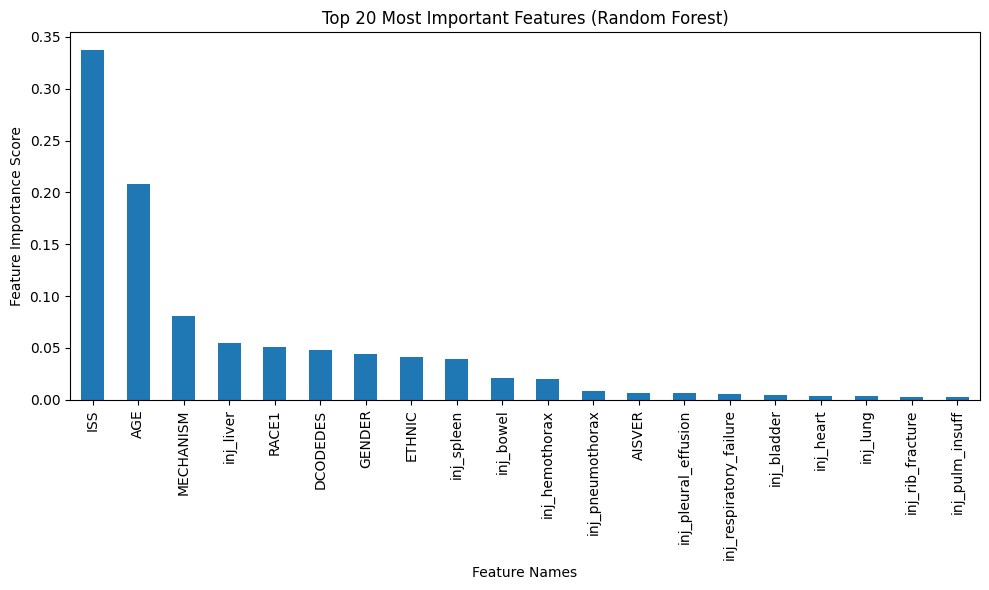

In [110]:
# Step 58 - Plot top 20 important features
import matplotlib.pyplot as plt

# Ensure correct feature names
feature_names = X_train_encoded.columns

# Get feature importances and pair them with feature names
importances = rf_model.feature_importances_
forest_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
forest_importance.head(20).plot(kind='bar')
plt.title("Top 20 Most Important Features (Random Forest)")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature Names")
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [111]:
#Step59
import statsmodels.api as sm

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_encoded)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Get summary with p-values and coefficients
summary = result.summary2()
print(summary)

# Calculate Odds Ratios
odds_ratios = pd.Series(np.exp(result.params), index=result.params.index)
print("\nOdds Ratios:")
print(odds_ratios)

         Current function value: 0.016959
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                  Results: Logit
Model:                  Logit                      Method:             MLE        
Dependent Variable:     Has_Diaphragmatic_Injury   Pseudo R-squared:   0.194      
Date:                   2025-06-25 17:22           AIC:                213473.9078
No. Observations:       6292087                    BIC:                213869.8971
Df Model:               28                         Log-Likelihood:     -1.0671e+05
Df Residuals:           6292058                    LL-Null:            -1.3235e+05
Converged:              0.0000                     LLR p-value:        0.0000     
No. Iterations:         35.0000                    Scale:              1.0000     
----------------------------------------------------------------------------------
                             Coef.   Std.Err.     z      P>|z|    [0.025   0.975] 
----------------------------------------------------------------------------------
const                        -7.3821  

In [79]:
##Step 44
## 1. Check distribution of RACE1 values
#print("Unique RACE1 values:", df_merged['RACE1'].unique())
#print("\nRACE1 value counts:")
#print(df_merged['RACE1'].value_counts(dropna=False))

## 2. Check injury rate per RACE1 group
#injury_by_race = df_merged.groupby('RACE1')['Has_Diaphragmatic_Injury'].mean().sort_values(ascending=False)
#print("\n Diaphragmatic Injury Rate by RACE1:")
#print(injury_by_race)

## 3. Check missing RACE1 values
#missing_race1 = df_merged['RACE1'].isna().sum()
#print(f"\nMissing RACE1 entries: {missing_race1}")

## 4. If needed, consolidate with RACE2
## Example: fill missing RACE1 with RACE2 (only if both exist and it makes clinical sense)
#if 'RACE2' in df_merged.columns:
#    df_merged['RACE1_filled'] = df_merged['RACE1'].fillna(df_merged['RACE2'])
#    print("\n RACE1 missing values filled using RACE2.")
#else:
    #df_merged['RACE1_filled'] = df_merged['RACE1']  # fallback


In [112]:
!pip install shap

In [113]:
import shap
import matplotlib.pyplot as plt

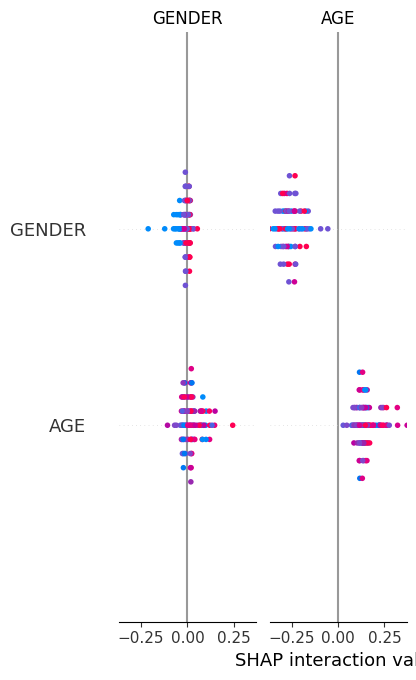

In [114]:
#Step60
# Limit SHAP to 100 samples for speed
sampled_X = X_train_encoded.sample(100, random_state=42)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(sampled_X)

# Summary plot for quick result
shap.summary_plot(shap_values, sampled_X, plot_type="bar")

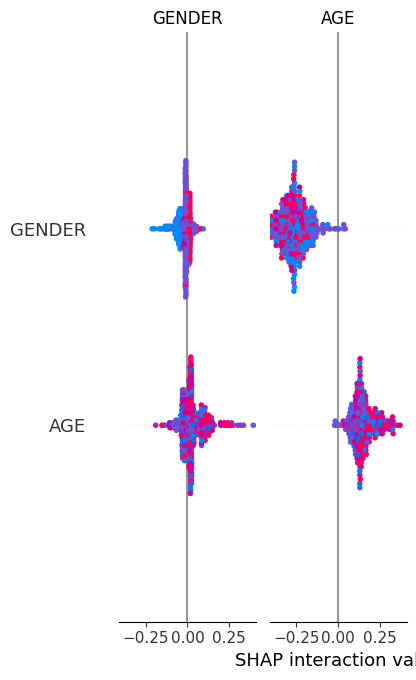

In [115]:
#Step61
# Larger but still reasonable sample, e.g., 500 rows
sampled_X = X_train_encoded.sample(500, random_state=42)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(sampled_X)

# Full summary bar plot
shap.summary_plot(shap_values, sampled_X, plot_type="bar")

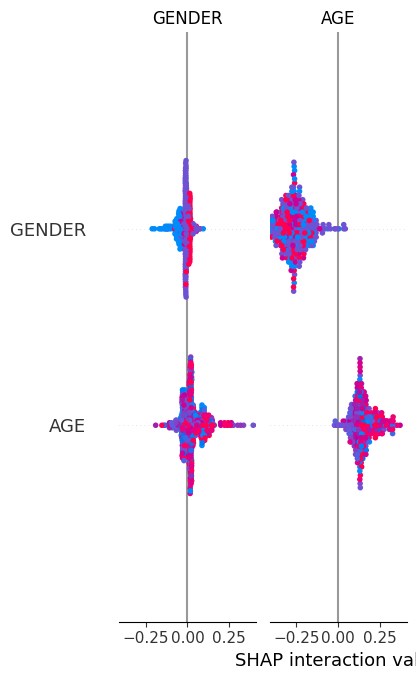

In [116]:
#Step62
# Limit SHAP to a smaller sample for speed
sampled_X = X_train_encoded.sample(500, random_state=42)  # Adjust 500 to a size your system handles

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(sampled_X)

# Bar plot for quick SHAP result
shap.summary_plot(shap_values, sampled_X, plot_type="bar")
